# MAP583 - Data Camp
# Course project
# Credit Card Fraud Detection

We have chosen this dataset from Kaggle (https://www.kaggle.com/dalpozz/creditcardfraud) (or maybe this one https://www.kaggle.com/mlg-ulb/creditcardfraud/data), because ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
# %matplotlib notebook
style.use('ggplot')

## Loading dataset

In [46]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check if there is null data
# data.isnull().sum()

In [4]:
# Useless
# data.describe()

## Removing 'Time' column and normalizing data

In [47]:
data.drop(['Time'], axis=1, inplace=True)

In [48]:
labels = data['Class']

In [49]:
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(data.values)
scaled_data = pd.DataFrame(scaled_features,
                        index=data.index,
                        columns=data.columns)

In [50]:
scaled_data.drop(['Class'], axis=1, inplace=True)
scaled_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


## Check target class

0    284315
1       492
Name: Class, dtype: int64


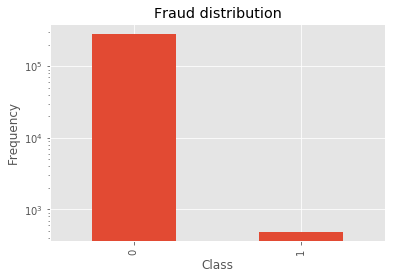

In [51]:
class_counts = labels.value_counts()
print(class_counts)

# Plot a histogram
class_counts.plot(kind='bar')
plt.title("Fraud distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.yscale('log')

## Splitting data

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    labels,
                                                    test_size=0.3)

## We will use only non-fraud points to train SVDD
In the library we only have SVDD implemented. There is not an implementation of SVDD-neg (a version that incorporates negative examples also).

LIBSVM:

https://github.com/cjlin1/libsvm
https://www.csie.ntu.edu.tw/~cjlin/libsvm/index.html
https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf # article
https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf # guide

SVDD:

https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/#libsvm_for_svdd_and_finding_the_smallest_sphere_containing_all_data

One-class SVM:

http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

Outras pessoas tiveram a mesma pergunta, mas aparentemente ninguém tem o SVDD-neg implementado
https://www.reddit.com/r/MachineLearning/comments/396o0n/experience_training_support_vector_data/

Biblioteca em MATLAB (tem a ver com o criador de SVDD)

https://www.tudelft.nl/ewi/over-de-faculteit/afdelingen/intelligent-systems/pattern-recognition-bioinformatics/pattern-recognition-laboratory/data-and-software/dd-tools/

In [54]:
non_fraud_X_train = X_train[y_train==0].values.tolist()
non_fraud_y_train = y_train[y_train==0].values.tolist()

In [55]:
from svm import *
from svmutil import *

In [56]:
problem = svm_problem(non_fraud_y_train,
                      non_fraud_X_train)
parameter = svm_parameter('-s 5 -t 0')
t = svm_train(problem, parameter)

In [57]:
y_test = y_test.values.tolist()
X_test = X_test.values.tolist()

In [58]:
result = svm_predict(y_test, X_test, t)

Accuracy = 0.160341% (136/85443) (classification)


In [59]:
result[1]

(0.16034081200332384, 0.9983965918799668, 5.638985837370134e-08)

In [63]:
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support, average_precision_score


average_precision = average_precision_score(y_test, result[0])
prfs = precision_recall_fscore_support(y_test, result[0], average='micro')

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

print(prfs)

Average precision-recall score: 0.00
(0.0016034081200332385, 0.0016034081200332385, 0.0016034081200332385, None)


In [66]:
y_burro = np.zeros(len(y_test))
average_precision = average_precision_score(y_test, y_burro)
prfs = precision_recall_fscore_support(y_test, y_burro, average='macro')

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

print(prfs)

Average precision-recall score: 0.00
(0.49919829593998338, 0.5, 0.49959882634744562, None)


/Users/enochyang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
